# Fit Chl

In [14]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.tara import io as tara_io
from oceancolor.ph import pigments

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

In [8]:
%matplotlib ipympl

# Load L23

In [4]:
nmf_fit, N_NMF, iop = 'L23', 4, 'a'
d = cnmf_io.load_nmf(nmf_fit, N_NMF, iop)
M = d['M']
coeff = d['coeff']
wave = d['wave']

# Load Chl pigments

In [7]:
chla = pigments.a_chl(wave, ctype='a')
chlb = pigments.a_chl(wave, ctype='b')
chlc = pigments.a_chl(wave, ctype='c12')

# Plot

In [15]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

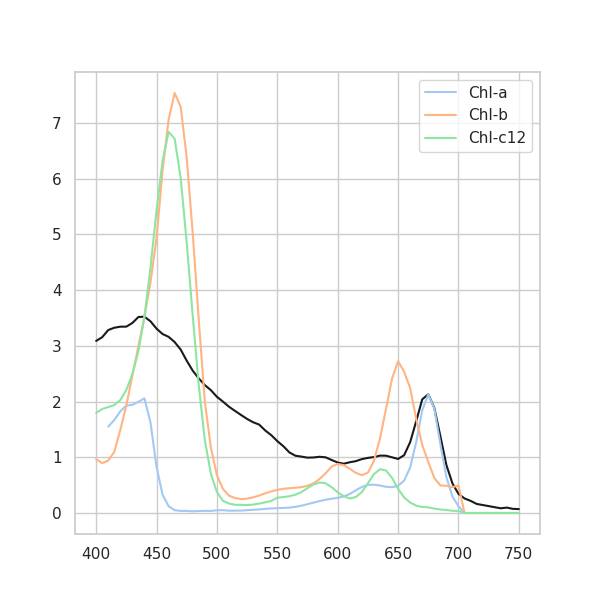

In [19]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()

# Basis function
ax.plot(wave, M[0], color='k')

# Chl
for pig, wv, lbl in zip([chla,chlb,chlc], [673.,440.,440.], ['a', 'b', 'c12']):
    iwv = np.argmin(np.abs(wave-wv))
    nrm = pig[iwv]/M[0,iwv]
    ax.plot(wave, pig/nrm, label=f'Chl-{lbl}')

ax.legend()
plt.show()